# Pyber

Findings:

* Being a Pyber driver in a rural or suburban area may be more profitable than an urban area due to the smaller amount of competition (number of drivers) and the average higher fare values
* There does seem to be enough demand to justify supply in many urban areas due to the large number of rides
* Certain suburban areas have a good combination of high number of rides, high average rides, and lower number of drivers - I would identify these and move there to be a pyber driver

In [5]:
#Dependencies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Assign path
citypath = ("city_data.csv")
ridepath = ("ride_data.csv")

In [7]:
# read into dfs
city_df = pd.read_csv(citypath)
ride_df = pd.read_csv(ridepath)

In [8]:
city_df.drop_duplicates(subset = "city", inplace = True)

In [9]:
#create fare statistics
avg_fare_city = ride_df[['city', 'fare']].groupby("city").mean()
tot_fare_city = ride_df[['city', 'fare']].groupby("city").sum()
count_rides_city = ride_df[['city', 'ride_id']].groupby('city').count()

In [10]:
#merge fare statistics into the city DataFrame
analysis_df = pd.merge(city_df, avg_fare_city, left_on = "city", right_index = True)
analysis_df = pd.merge(analysis_df, tot_fare_city, left_on = "city", right_index = True)
analysis_df = pd.merge(analysis_df, count_rides_city, left_on = "city", right_index = True)
analysis_df.rename(columns = {"driver_count": "Total Number of Drivers", "type": "City Type", "fare_x": "Average Fare", "fare_y": "Sum of Fares","ride_id": "Total Number of Rides"}, inplace = True)
analysis_df.head()

,city,Total Number of Drivers,City Type,Average Fare,Sum of Fares,Total Number of Rides
0,Kelseyland,63,Urban,21.806429,610.58,28
1,Nguyenbury,8,Urban,25.899615,673.39,26
2,East Douglas,12,Urban,26.169091,575.72,22
3,West Dawnfurt,34,Urban,22.330345,647.58,29
4,Rodriguezburgh,52,Urban,21.332609,490.65,23


In [11]:
# Create three data frames to be easily used in teh plots
urban_analysis_df = analysis_df[analysis_df['City Type'] == "Urban"]
suburban_analysis_df = analysis_df[analysis_df['City Type'] == "Suburban"]
rural_analysis_df = analysis_df[analysis_df['City Type'] == "Rural"]

In [12]:
# Set the colors
colors = ['gold', 'skyblue', 'lightcoral']

Text(0.5,1,'Average Fare vs. Total Number of Rides. Note - size of circle is in relation to number of Drivers')

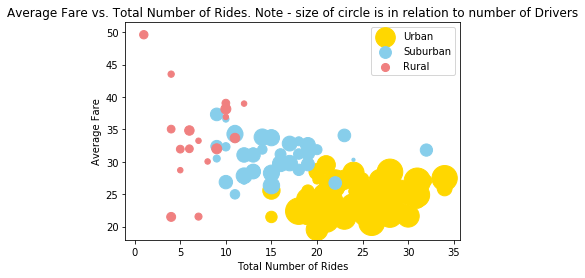

In [13]:
# Create the bubblechart
plt.scatter(x = urban_analysis_df['Total Number of Rides'], y = urban_analysis_df['Average Fare'], 
           s = urban_analysis_df['Total Number of Drivers'] * 10, c = colors[0], label = "Urban")
plt.scatter(x = suburban_analysis_df['Total Number of Rides'], y = suburban_analysis_df['Average Fare'],
           s = suburban_analysis_df['Total Number of Drivers'] * 10, c = colors[1], label = "Suburban")
plt.scatter(x = rural_analysis_df['Total Number of Rides'], y = rural_analysis_df['Average Fare'],
           s = rural_analysis_df['Total Number of Drivers'] * 10, c = colors[2], label = "Rural")
plt.legend()
plt.xlabel("Total Number of Rides")
plt.ylabel("Average Fare")
plt.title("Average Fare vs. Total Number of Rides. Note - size of circle is in relation to number of Drivers")

In [14]:
#create separate dataframes to use in the pie charts
fares_city_type = analysis_df[['Sum of Fares', 'City Type']].groupby('City Type').sum()
rides_city_type = analysis_df[['Total Number of Rides', 'City Type']].groupby('City Type').sum()
drivers_city_type = analysis_df[['Total Number of Drivers', 'City Type']].groupby('City Type').sum()

In [15]:
# Sort by teh values so that they can be graphed similarly
fares_city_type.sort_values(by = "Sum of Fares", ascending = False)
rides_city_type.sort_values(by = "Total Number of Rides", ascending = False)
drivers_city_type.sort_values(by = "Total Number of Drivers", ascending = False)

,Total Number of Drivers
City Type,
Urban,2607
Suburban,635
Rural,104


Text(0.5,1,'% of Total Fares by City Type')

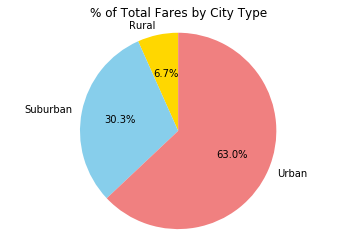

In [16]:
#Plot the % of Total Fares by City Type
plt.pie(fares_city_type, colors = colors, labels = fares_city_type.index, autopct = "%1.1f%%", startangle = 90)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

Text(0.5,1,'% of Total Rides by City Type')

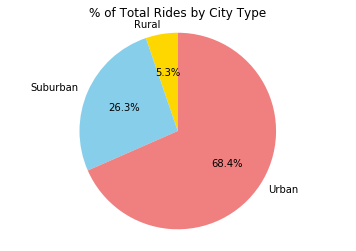

In [17]:
#Plot the % of Total Rides by City Type
plt.pie(rides_city_type, colors = colors, labels = rides_city_type.index, autopct = "%1.1f%%", startangle = 90)
plt.axis("equal")
plt.title("% of Total Rides by City Type")

Text(0.5,1,'% of Total Drivers by City Type')

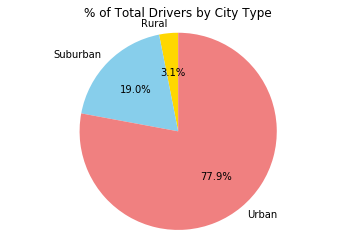

In [18]:
#Plot the % of Total Drivers by City Type
plt.pie(drivers_city_type, colors = colors, labels = drivers_city_type.index, autopct = "%1.1f%%", startangle = 90)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")